In [1]:
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from config import gkey
from geopy import geocoders
gmaps.configure(api_key=gkey)

In [2]:
file="Resources/attacks.csv"
pd.set_option('display.max_columns', None)
df = pd.read_csv(file,encoding = 'cp1252')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


Read in Shark Attack CSV file

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Review data information and prepare to drop the columns we will not be using in the EDA.

In [4]:
df.columns


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
df = df.drop(['Name', 'Injury',  'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'], axis=1)
df. head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,N


Get the column names and then drop the columns that we will not be using in the EDA.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  8702 non-null   object 
 1   Date         6302 non-null   object 
 2   Year         6300 non-null   float64
 3   Type         6298 non-null   object 
 4   Country      6252 non-null   object 
 5   Area         5847 non-null   object 
 6   Location     5762 non-null   object 
 7   Activity     5758 non-null   object 
 8   Sex          5737 non-null   object 
 9   Age          3471 non-null   object 
 10  Fatal (Y/N)  5763 non-null   object 
dtypes: float64(1), object(10)
memory usage: 2.2+ MB


In [7]:
df.drop_duplicates(subset="Case Number", inplace=True)

Remove duplicate case numbers/incident reports

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6288 entries, 0 to 25722
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  6287 non-null   object 
 1   Date         6286 non-null   object 
 2   Year         6284 non-null   float64
 3   Type         6282 non-null   object 
 4   Country      6236 non-null   object 
 5   Area         5832 non-null   object 
 6   Location     5746 non-null   object 
 7   Activity     5744 non-null   object 
 8   Sex          5722 non-null   object 
 9   Age          3465 non-null   object 
 10  Fatal (Y/N)  5751 non-null   object 
dtypes: float64(1), object(10)
memory usage: 589.5+ KB


In [9]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)  

Print to CSV file to check that data cleaning was correct.

In [10]:
df = df[(df['Year'] >= 2000)]

Filter out the years we are not including in the analysis. 

Summary:
1. We read in our CSV file
2. We reviewed the data types and column row counts
3. We dropped the irrelvant columns to our analysis
4. We removed the duplicates in case numbers/incident reports
5. Printed data to CSV file to double check the work
6. We filtered out years prior to 2000

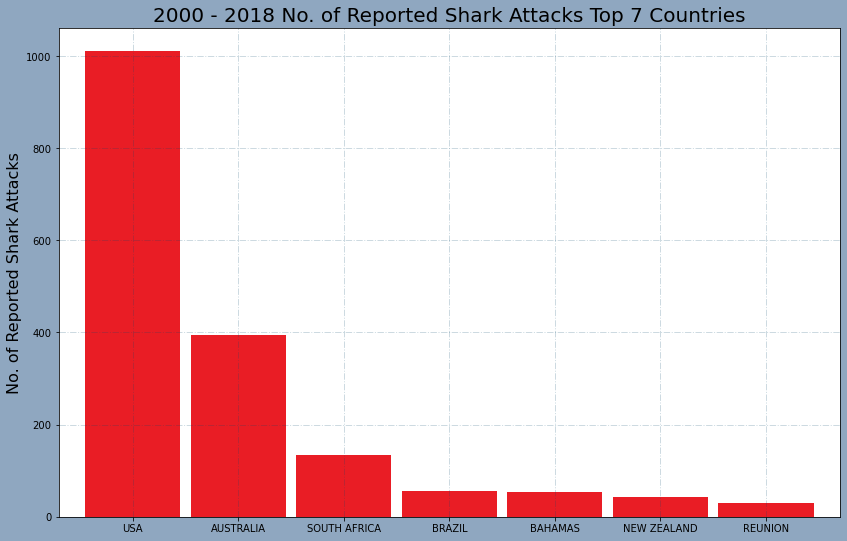

In [81]:

plt.figure(facecolor="#8fa7c0",figsize =(14, 9))

df['Country'].value_counts().head(7).plot(kind='bar',color="#e91d25",width =.9)


plt.ylabel("No. of Reported Shark Attacks", fontsize=16)
plt.xticks(rotation=0)
plt.title("2000 - 2018 No. of Reported Shark Attacks Top 7 Countries", fontsize=20)
plt.grid(color ='#05486c',
        linestyle ='-.', linewidth = 1,
        alpha = 0.2)

plt.show()